<center><h1>Module 2 Assignment</h1></center>

# Choose a dataset

Choose a dataset from [NYC Open Data](https://opendata.cityofnewyork.us/) that is available in CSV format (look at the format labels in the list of datasets). Choose one that has at least 2 numerical value columns and 1 string value column. 

If it's a CSV file you may be able to directly read it with pandas
```
pd.read_csv(url)
```

If it is a compressed file (.zip, .gz, etc.), download the zip and unpack it, then read it in with pandas
```
pd.read_csv(<filename>.csv)
```

In [1]:
import matplotlib.pyplot as plt
# %matplotlib inline
import seaborn as sns
import pandas as pd
data = pd.read_csv('https://data.cityofnewyork.us/resource/k397-673e.csv')

## Display top 7 rows of the dataframe in your notebook

In [2]:
data.head(7)

,fiscal_year,payroll_number,agency_name,last_name,first_name,mid_init,agency_start_date,work_location_borough,title_description,leave_status_as_of_july_31,base_salary,pay_basis,regular_hours,regular_gross_paid,ot_hours,total_ot_paid,total_other_pay
0,2020,67,ADMIN FOR CHILDREN'S SVCS,DANIELS,SHAARON,L,2018-11-05T00:00:00.000,BROOKLYN,SPECIAL OFFICER,ACTIVE,35985.0,per Annum,1888.0,30453.14,426.50,10243.03,1601.54
1,2020,67,ADMIN FOR CHILDREN'S SVCS,LUCAS,DEVIN,D,2011-07-04T00:00:00.000,MANHATTAN,INSTITUTIONAL AIDE,ACTIVE,39804.0,per Annum,2080.0,39192.98,119.00,2741.98,410.55
2,2020,67,ADMIN FOR CHILDREN'S SVCS,NOVA,VALERIE,R,2016-10-17T00:00:00.000,RICHMOND,CHILD PROTECTIVE SPECIALIST,ACTIVE,60327.0,per Annum,1750.0,56748.61,221.25,8950.15,1526.14
3,2020,67,ADMIN FOR CHILDREN'S SVCS,WILLIAMS,JANDI MARIES,U,2016-08-29T00:00:00.000,MANHATTAN,CONGREG CARE SPEC - ACS,ACTIVE,42731.0,per Annum,1750.0,42074.82,0.00,0.00,239.10
4,2020,67,ADMIN FOR CHILDREN'S SVCS,ABITBOL,EVAN,NaN,2019-01-22T00:00:00.000,BRONX,AGENCY ATTORNEY INTERNE,ACTIVE,71757.0,per Annum,1820.0,72028.59,144.50,8063.22,707.38
5,2020,67,ADMIN FOR CHILDREN'S SVCS,MINGO,JAMELLE,S,2019-09-23T00:00:00.000,BRONX,YOUTH DEVELOPMENT SPECIALIST,ACTIVE,45759.0,per Annum,1365.0,35141.99,209.00,7096.71,139.42
6,2020,67,ADMIN FOR CHILDREN'S SVCS,KELLER,JEANETTE,G,2015-01-05T00:00:00.000,MANHATTAN,CHILD PROTECTIVE SPECIALIST,ACTIVE,60327.0,per Annum,1820.0,58937.60,272.50,10982.08,1830.75


## Count number of null values (if any) for each column

In [3]:
data.isnull().sum()

fiscal_year                     0
payroll_number                  0
agency_name                     0
last_name                       0
first_name                      0
mid_init                      322
agency_start_date               0
work_location_borough           0
title_description               0
leave_status_as_of_july_31      0
base_salary                     0
pay_basis                       0
regular_hours                   0
regular_gross_paid              0
ot_hours                        0
total_ot_paid                   0
total_other_pay                 0
dtype: int64

## Remove all but 2 numerical values columns of your choice and display the reducted dataframe.

In [4]:
data = data[['base_salary', 'regular_gross_paid']]
data.head()

,base_salary,regular_gross_paid
0,35985.0,30453.14
1,39804.0,39192.98
2,60327.0,56748.61
3,42731.0,42074.82
4,71757.0,72028.59


## Display the average, median, and standard deviation of each of your numerical columns

In [5]:
data.describe().iloc[[1,5,2],].rename(index={'mean':'Average', '50%':'Median', 'std':'Standard Deviation'})

,base_salary,regular_gross_paid
Average,71322.518000,68616.305490
Median,60351.000000,58988.955000
Standard Deviation,21283.521086,21056.467995


## Plot two of the numerical columns one against the other in a scatter plot

(0.0, 161325.087)

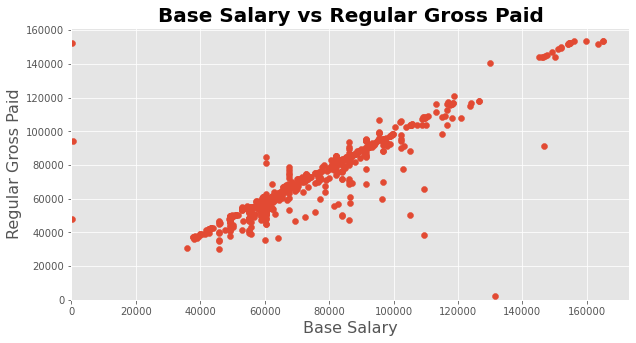

In [6]:
plt.style.use('ggplot')
plt.figure(figsize=(10,5))
plt.scatter(x=data['base_salary'], y=data['regular_gross_paid'])
plt.title('Base Salary vs Regular Gross Paid', fontsize=20, fontweight='bold')
plt.xlabel('Base Salary', fontsize=16)
plt.ylabel('Regular Gross Paid', fontsize=16)
plt.xlim(left=0)
plt.ylim(bottom=0)

## Plot the data distribution of all your numerical columns in histogram and boxplot

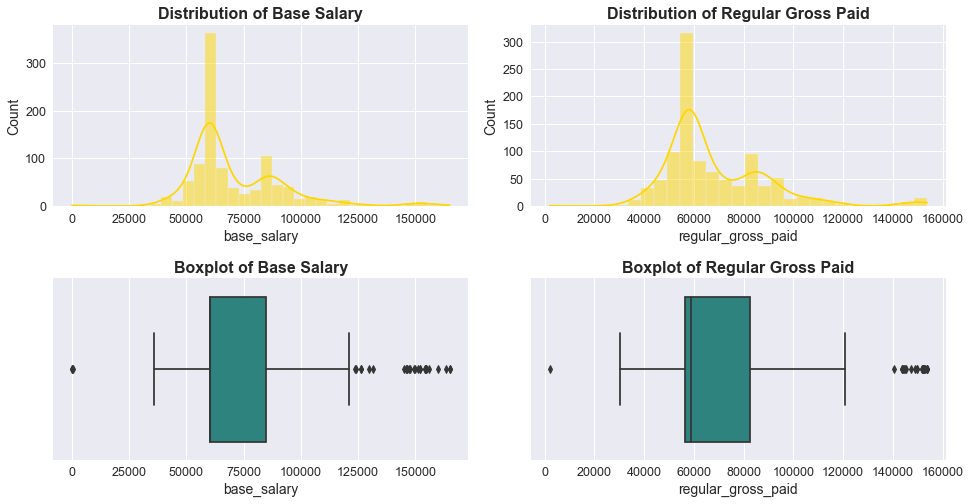

In [7]:
plt.style.use('seaborn')
plt.figure(figsize=(16,8))
plt.subplots_adjust(hspace=.4, wspace=.15)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12.5
plt.rcParams['ytick.labelsize'] = 12.5
plt.rcParams['axes.titleweight'] = 'bold'

for i, col in enumerate(data.columns):
    plt.subplot(2,2,i+1)    
    sns.histplot(data=data, x=col, kde=True, color='gold')
    col_ = ' '.join(col.split('_')).title()
    plt.title('Distribution of {}'.format(col_))

for i, col in enumerate(data.columns):
    plt.subplot(2,2,i+3)    
    sns.boxplot(data=data, x=col, palette='viridis')
    col_ = ' '.join(col.split('_')).title()
    plt.title('Boxplot of {}'.format(col_))


## Create a new column in the same dataframe that is raised power of two of an existing column
Example:
![power_of_two](images/ex1.jpeg)


In [8]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
for col in data.columns:
    data['raised_value_of_'+col] = data[col]**2
data.head()

,base_salary,regular_gross_paid,raised_value_of_base_salary,raised_value_of_regular_gross_paid
0,35985.00,30453.14,1294920225.00,927393735.86
1,39804.00,39192.98,1584358416.00,1536089681.28
2,60327.00,56748.61,3639346929.00,3220404736.93
3,42731.00,42074.82,1825938361.00,1770290478.03
4,71757.00,72028.59,5149067049.00,5188117777.39


# Citi Bike investigation
![citi-bike](images/citibike.jpeg)
>Citi Bike is the largest bike share program in the US, with 20,000 bikes and over 1,300 stations across Manhattan, Brooklyn, Queens, the Bronx and Jersey City. It was designed for quick trips with convenience in mind, and it’s a fun and affordable way to get around town.

## Choose a citibikes dataset (one or two months, earlier datasets are convenient because they are smaller)

Example for downloading September 2017 Citibike data:
```
! month=201709
! curl https://s3.amazonaws.com/tripdata/$month-citibike-tripdata.csv.zip >> $month-citibike-tripdata.csv.zip
! unzip $month-citibike-tripdata.csv.zip
```

In [9]:
# ! month=201712
# ! curl https://s3.amazonaws.com/tripdata/$month-citibike-tripdata.csv.zip >> $month-citibike-tripdata.csv.zip
# ! unzip $month-citibike-tripdata.csv.zip

data_bike = pd.read_csv('https://s3.amazonaws.com/tripdata/201712-citibike-tripdata.csv.zip')
data_bike.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,256,2017-12-01 00:00:00,2017-12-01 00:04:17,324,DeKalb Ave & Hudson Ave,40.69,-73.98,262,Washington Park,40.69,-73.97,18858,Subscriber,1981.00,1
1,325,2017-12-01 00:00:17,2017-12-01 00:05:43,470,W 20 St & 8 Ave,40.74,-74.00,490,8 Ave & W 33 St,40.75,-73.99,19306,Subscriber,1992.00,1
2,967,2017-12-01 00:00:19,2017-12-01 00:16:26,347,Greenwich St & W Houston St,40.73,-74.01,504,1 Ave & E 16 St,40.73,-73.98,28250,Subscriber,1992.00,1
3,125,2017-12-01 00:00:20,2017-12-01 00:02:26,3077,Stagg St & Union Ave,40.71,-73.95,3454,Leonard St & Maujer St,40.71,-73.95,25834,Subscriber,1988.00,1
4,451,2017-12-01 00:00:28,2017-12-01 00:08:00,368,Carmine St & 6 Ave,40.73,-74.00,326,E 11 St & 1 Ave,40.73,-73.98,14769,Subscriber,1986.00,1


## Count the number of missing values of each column

In [10]:
data_bike.isnull().sum()

tripduration                   0
starttime                      0
stoptime                       0
start station id               0
start station name             0
start station latitude         0
start station longitude        0
end station id                 0
end station name               0
end station latitude           0
end station longitude          0
bikeid                         0
usertype                       0
birth year                 39445
gender                         0
dtype: int64

## Who rides citibikes? Show ridership distribution by gender, user type, and age
Process the data and plot your answers

[Text(0.5, 1.0, 'Ridership Distribution by Age')]

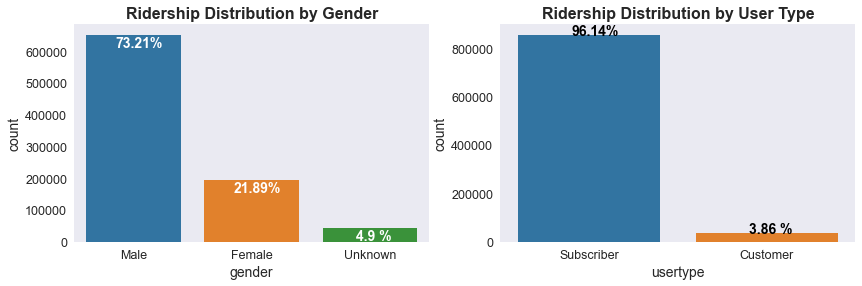

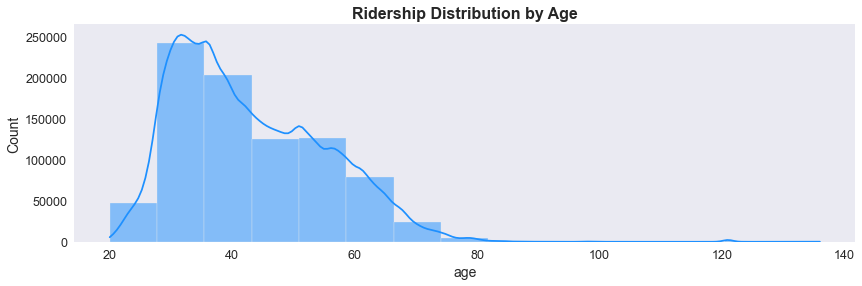

In [11]:
import datetime

# data prep.
gender = data_bike[['gender']].copy()
gender.replace(
    { 0: 'Unknown',
      1: 'Male',
      2: 'Female'}
    ,inplace=True)

userType = data_bike[['usertype']].copy()

age = datetime.datetime.now().year - data_bike[['birth year']]
age.columns = ['age']


# plotting
plt.style.use('seaborn-dark')
fig,ax = plt.subplots(1,2,figsize=(14,4))

sns.countplot(x='gender', data=gender, ax=ax[0], palette='tab10',
              order=gender['gender'].value_counts().index)\
   .set(title='Ridership Distribution by Gender')
totals = [i.get_height() for i in ax[0].patches]
total = sum(totals)
for i in ax[0].patches:  
    ax[0].text(i.get_x()+.25, i.get_height()-37500,
               '{:^5}%'.format(round((i.get_height()/total)*100, 2)), 
               fontsize=14, color='white', weight='bold')   

sns.countplot(x='usertype', data=userType, ax=ax[1], palette='tab10',
              order=userType['usertype'].value_counts().index)\
   .set(title='Ridership Distribution by User Type')
totals = [i.get_height() for i in ax[1].patches]
total = sum(totals)
for i in ax[1].patches:  
    ax[1].text(i.get_x()+.3, i.get_height(),#-37500, 
               '{:^5}%'.format(round((i.get_height()/total)*100, 2)), 
               fontsize=14, color='k', weight='bold')   
    
fig,ax = plt.subplots(1,1,figsize=(14,4))
sns.histplot(data=age, x='age', kde=True, color='dodgerblue', bins=15)\
   .set(title='Ridership Distribution by Age')

## What is the average number of trips per day?

In [12]:
import math

data_bike['starttime'] = pd.to_datetime(data_bike['starttime'])
avg_trip_day = data_bike.groupby(data_bike['starttime'].dt.day)['starttime'].count().mean()
print('Every day, on average there are {} trips'.format(math.ceil(avg_trip_day))) 

Every day, on average there are 28709 trips


## What is the average trip duration?

In [13]:
print('On average, the trip duration is {} minutes'.format(math.ceil(data_bike['tripduration'].mean()/60)))

On average, the trip duration is 13 minutes


## What days of the week are most rides taken on?
Process the data and plot your answer

<AxesSubplot:title={'center':'Bike Rental Distribution by Day'}, ylabel='Count'>

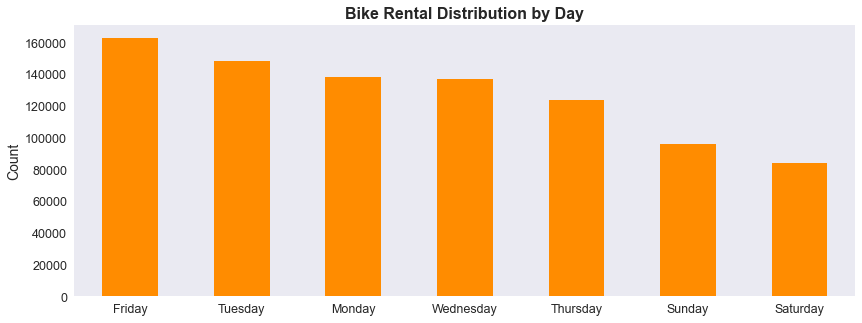

In [14]:
data_bike.groupby(data_bike['starttime'].dt.day_name())\
['starttime'].count().reset_index(name='Count')\
.rename(columns={'starttime':'Day'}).sort_values('Count', ascending=False)\
.plot(kind='bar', x='Day', rot=0, figsize=(14,5), title='Bike Rental Distribution by Day', 
      legend=False, ylabel='Count', xlabel='', color='darkorange')

Most rides take on Friday

## What hour of the day are most rides taken on?
Process the data and plot your answer

Text(0.5, 1.0, 'Bike Rental Traffic by Hour')

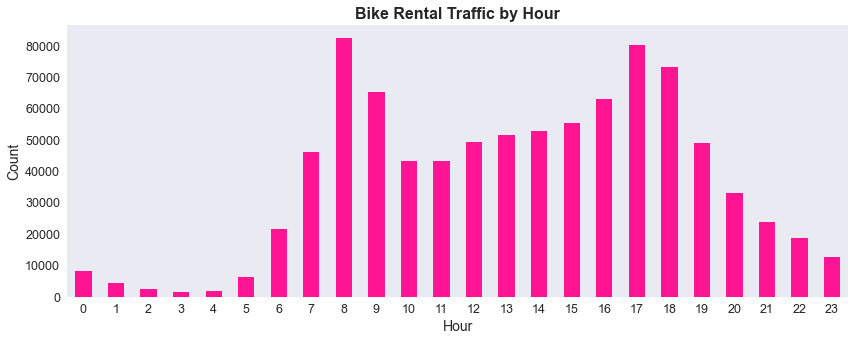

In [15]:
data_bike['hour'] = data_bike['starttime'].dt.hour
data_bike['hour'].value_counts().sort_index()\
.plot(kind='bar',rot=0, xlabel='Hour', ylabel='Count', 
      figsize=(14,5), color='deeppink')
plt.title('Bike Rental Traffic by Hour')

Most rides are takes on 8 am and 6 pm

## Is there correlation between age and trip duration?

In [16]:
from scipy.stats import pearsonr
import numpy as np

age_trip_corr = pearsonr(age.age.replace(np.nan,0), data_bike['tripduration'])[0]
print('Pearson correlation between age and trip duration is {}, it means there is no linear '\
      'correlation between them. In other words, in other words, age has no effect on trip duration'\
      .format(round(age_trip_corr,2)))

Pearson correlation between age and trip duration is -0.01, it means there is no linear correlation between them. In other words, in other words, age has no effect on trip duration


## What are the top 10 pair of stations that our riders use as a start & stopping point?

In [17]:
data_bike['paired station'] = data_bike['start station name'].apply(lambda x: '{:28s} => '.format(x)) +\
                              data_bike['end station name'].apply(lambda x: '{:26s} :'.format(x))
print('{:^70s}'.format('Top 10 Station Pairs used by Riders'))
print('-'*70)
print('{:^28s} => {:^25s}  : {:^10s}'.format('Start Station Name', 'End Station Name', 'Count'))
print('-'*70)
print(data_bike['paired station'].value_counts().nlargest(10))
print('-'*70)

                 Top 10 Station Pairs used by Riders                  
----------------------------------------------------------------------
     Start Station Name      =>     End Station Name       :   Count   
----------------------------------------------------------------------
E 7 St & Avenue A            => Cooper Square & Astor Pl   :    571
W 21 St & 6 Ave              => 9 Ave & W 22 St            :    364
S 4 St & Wythe Ave           => N 6 St & Bedford Ave       :    331
Pershing Square North        => Broadway & W 32 St         :    323
E 33 St & 2 Ave              => W 33 St & 7 Ave            :    308
DeKalb Ave & Vanderbilt Ave  => DeKalb Ave & Hudson Ave    :    304
Greenwich Ave & Charles St   => Greenwich Ave & Charles St :    303
6 Ave & W 33 St              => Pershing Square North      :    278
E 102 St & 1 Ave             => 2 Ave & E 96 St            :    276
Willoughby St & Fleet St     => Adelphi St & Myrtle Ave    :    273
Name: paired station, dtype: int64


## Come up with your own question on the Citibike data usage and formulate a hypothesis

### Example:
### "Women are less likely than men to choose biking for commuting."
>
>Null Hypothesis: 

>The proportion of men biking on weekends is the same or higher than the proportion of women biking on weekends



### Answer:
### "`usertype` _Customer_ prefer cycling on **weekend**, while _Subscriber_ on **weekdays**"
> Null Hypothesis:   

> On weekend (saturday-sunday), proportion of `usertype` customer is more than subscriber. But, vice versa on weekdays

## Work with your dataset and show your findings to help answer your question

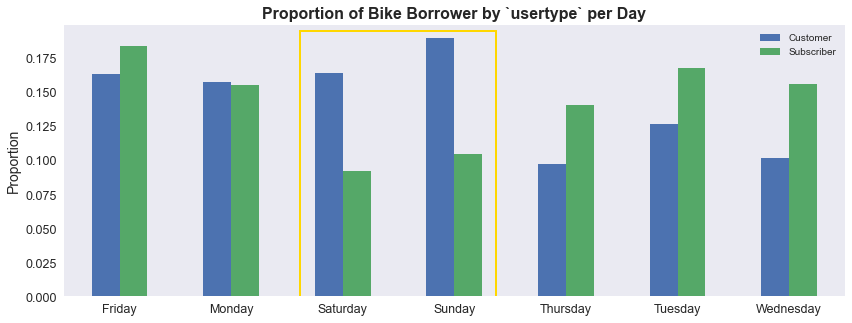

In [18]:
import matplotlib.patches as mpatches

data_bike['day'] = data_bike['starttime'].dt.day_name()
a = data_bike[(data_bike['usertype'] == 'Customer')]['day'].value_counts(normalize=True).sort_index().to_frame('Customer')
b = data_bike[(data_bike['usertype'] != 'Customer')]['day'].value_counts(normalize=True).sort_index().to_frame('Subscriber')
c = pd.concat([a,b], axis=1)
c.plot(kind='bar', figsize=(14,5), rot=0, ylabel='Proportion')
plt.title('Proportion of Bike Borrower by `usertype` per Day')
rect=mpatches.Rectangle((1.62,-.1),1.75,.295, fill = False,
                        color = 'gold', linewidth = 2)
plt.gca().add_patch(rect)

From plot above, it can be seen that `usertype` _Customer_ has a much larger proportion on saturday and sunday (**weekend**) than _Subscriber_. In other hand, `usertype` _Subscriber_ have more proportion than _Customer_ on **almost all weekdays**.

# Submit Instructions
Rename this notebook to `mod2_<first_name>_<last_name>.ipynb` and push this to your branch in module-2 repository

```
git checkout -b tanyani
git add mod2_tanya_nabila.ipynb
git commit -m 'submit mod2 assignment for Tanya Nabila'
git push
```